In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv(r'C:\Users\Kerry\multilingual_mobile_app_reviews_2025.csv')
df.shape

(2514, 15)

In [2]:
df.head()

,review_id,user_id,app_name,app_category,review_text,review_language,rating,review_date,verified_purchase,device_type,num_helpful_votes,user_age,user_country,user_gender,app_version
0,1,1967825,MX Player,Travel & Local,Qui doloribus consequuntur. Perspiciatis tempo...,no,1.3,2024-10-09 19:26:40,True,Android Tablet,65,14.0,China,Female,1.4
1,2,9242600,Tinder,Navigation,"Great app but too many ads, consider premium v...",ru,1.6,2024-06-21 17:29:40,True,iPad,209,18.0,Germany,Male,8.9
2,3,7636477,Netflix,Dating,The interface could be better but overall good...,es,3.6,2024-10-31 13:47:12,True,iPad,163,67.0,Nigeria,Male,2.8.37.5926
3,4,209031,Venmo,Productivity,"Latest update broke some features, please fix ...",vi,3.8,2025-03-12 06:16:22,True,iOS,664,66.0,India,Female,10.2
4,5,7190293,Google Drive,Education,"Perfect for daily use, highly recommend to eve...",tl,3.2,2024-04-21 03:48:27,True,iPad,1197,40.0,South Korea,Prefer not to say,4.7


In [3]:
df.tail()

,review_id,user_id,app_name,app_category,review_text,review_language,rating,review_date,verified_purchase,device_type,num_helpful_votes,user_age,user_country,user_gender,app_version
2509,2510,2322118,OneDrive,Business,Счастье низкий пастух. Нож неожиданно поезд тр...,nl,3.0,2023-11-23 01:07:30,False,iOS,635,21.0,Malaysia,Non-binary,1.1.2-beta
2510,2511,2167693,Signal,Finance,This app is amazing! Really love the new featu...,ms,1.9,2025-06-05 16:42:20,True,Windows Phone,1127,38.0,Bangladesh,NaN,v12.0.80
2511,2512,5554467,OneDrive,Social Networking,This app is amazing! Really love the new featu...,zh,3.4,2024-06-15 05:02:18,True,Android Tablet,677,27.0,Pakistan,NaN,9.1.32.4821
2512,2513,8805125,Coursera,Social Networking,Invitare convincere pericoloso corsa fortuna. ...,da,2.7,2023-12-02 01:41:31,True,Android,155,35.0,India,NaN,v8.9.13
2513,2514,1099793,Venmo,Education,"Latest update broke some features, please fix ...",it,2.1,2025-03-04 02:51:17,True,Android,1040,26.0,Bangladesh,Prefer not to say,2.2


In [4]:
df.isnull().sum()

review_id              0
user_id                0
app_name               0
app_category           0
review_text           59
review_language        0
rating                37
review_date            0
verified_purchase      0
device_type            0
num_helpful_votes      0
user_age               0
user_country          41
user_gender          587
app_version           30
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df_clean = df.copy()

df_clean['review_text']   = df_clean['review_text'].fillna("No review text provided")
df_clean['user_country']  = df_clean['user_country'].fillna("Unknown")
df_clean['user_gender']   = df_clean['user_gender'].fillna("Prefer not to say")
df_clean['app_version']   = df_clean['app_version'].fillna("Unknown")
df_clean['rating']        = df_clean['rating'].fillna(df_clean['rating'].median())

null_summary_clean = df_clean.isnull().sum()

null_summary_clean

review_id            0
user_id              0
app_name             0
app_category         0
review_text          0
review_language      0
rating               0
review_date          0
verified_purchase    0
device_type          0
num_helpful_votes    0
user_age             0
user_country         0
user_gender          0
app_version          0
dtype: int64

In [7]:
df_clean.duplicated().sum()

0

In [8]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2514 entries, 0 to 2513
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   review_id          2514 non-null   int64  
 1   user_id            2514 non-null   int64  
 2   app_name           2514 non-null   object 
 3   app_category       2514 non-null   object 
 4   review_text        2514 non-null   object 
 5   review_language    2514 non-null   object 
 6   rating             2514 non-null   float64
 7   review_date        2514 non-null   object 
 8   verified_purchase  2514 non-null   bool   
 9   device_type        2514 non-null   object 
 10  num_helpful_votes  2514 non-null   int64  
 11  user_age           2514 non-null   float64
 12  user_country       2514 non-null   object 
 13  user_gender        2514 non-null   object 
 14  app_version        2514 non-null   object 
dtypes: bool(1), float64(2), int64(3), object(9)
memory usage: 277.6+ KB


In [9]:
df_clean.describe()

,review_id,user_id,rating,num_helpful_votes,user_age
count,2514.000000,2.514000e+03,2514.000000,2514.000000,2514.000000
mean,1257.500000,5.080737e+06,3.020724,616.704057,44.247812
std,725.873612,2.846939e+06,1.141461,363.745326,18.372290
min,1.000000,1.005990e+05,1.000000,0.000000,13.000000
25%,629.250000,2.595184e+06,2.100000,287.250000,28.000000
50%,1257.500000,5.059846e+06,3.000000,620.000000,44.000000
75%,1885.750000,7.571874e+06,4.000000,920.750000,60.000000
max,2514.000000,9.995027e+06,5.000000,1249.000000,75.000000


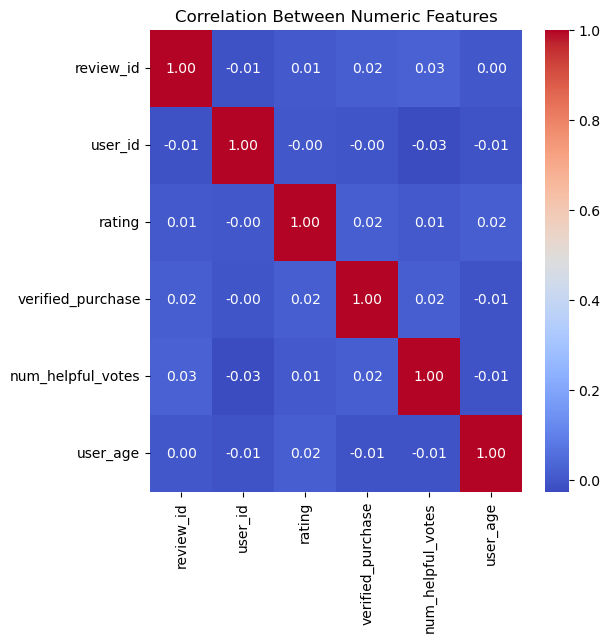

In [10]:
plt.figure(figsize=(6, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Between Numeric Features")
plt.show()

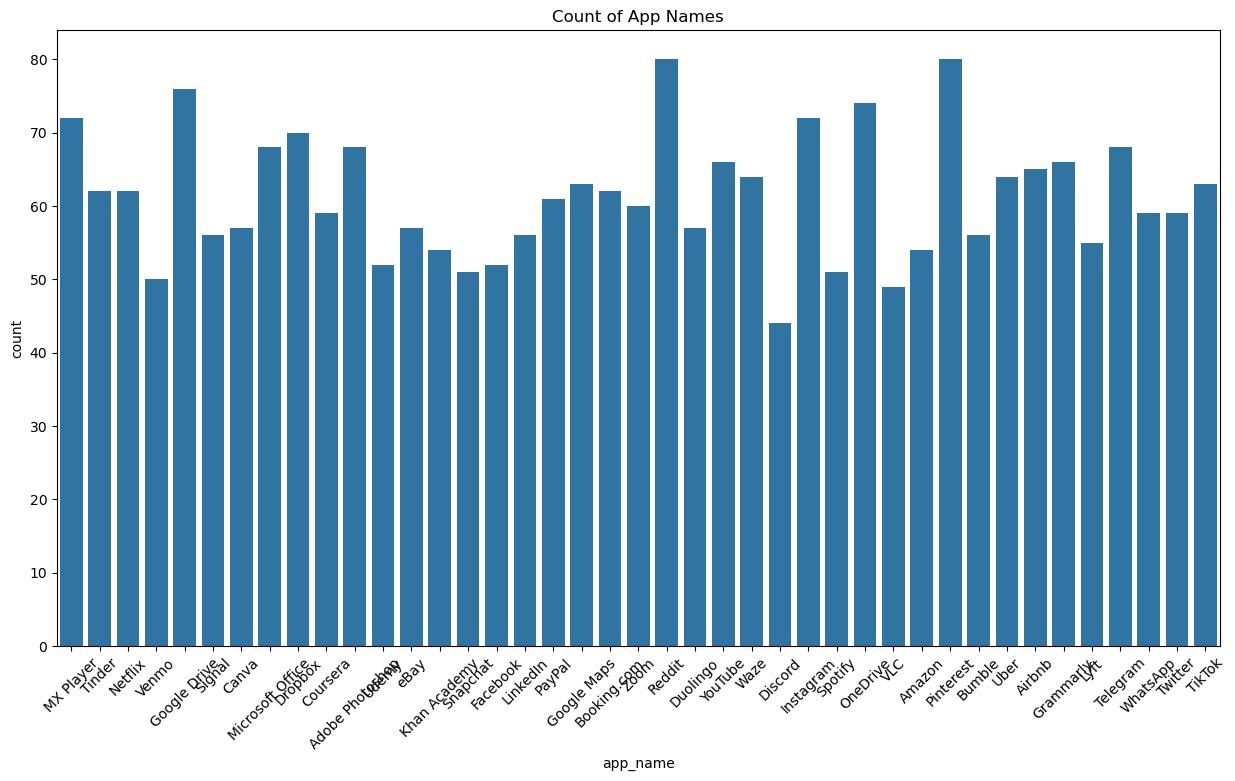

In [11]:
plt.figure(figsize=(15,8))
sns.countplot(data=df_clean, x='app_name')
plt.title('Count of App Names')
plt.xticks(rotation=45)
plt.show()

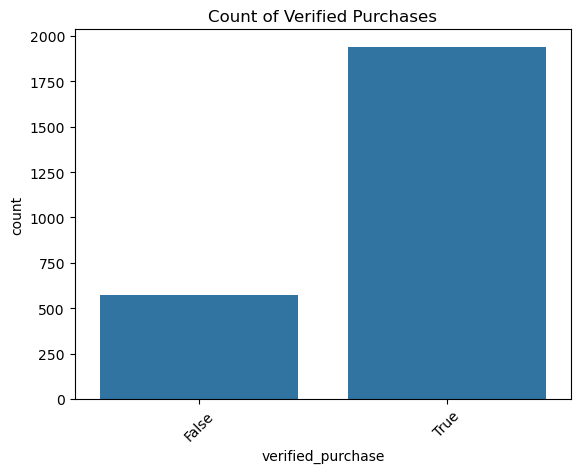

In [12]:
sns.countplot(data=df_clean, x='verified_purchase')
plt.title('Count of Verified Purchases')
plt.xticks(rotation=45)
plt.show()

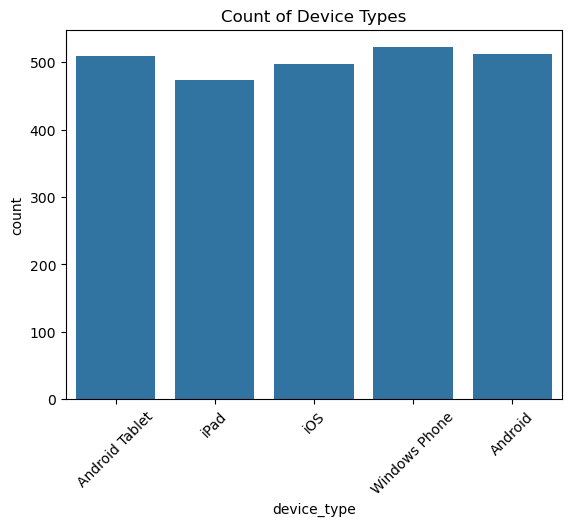

In [11]:
sns.countplot(data=df_clean, x='device_type')
plt.title('Count of Device Types')
plt.xticks(rotation=45)
plt.show()

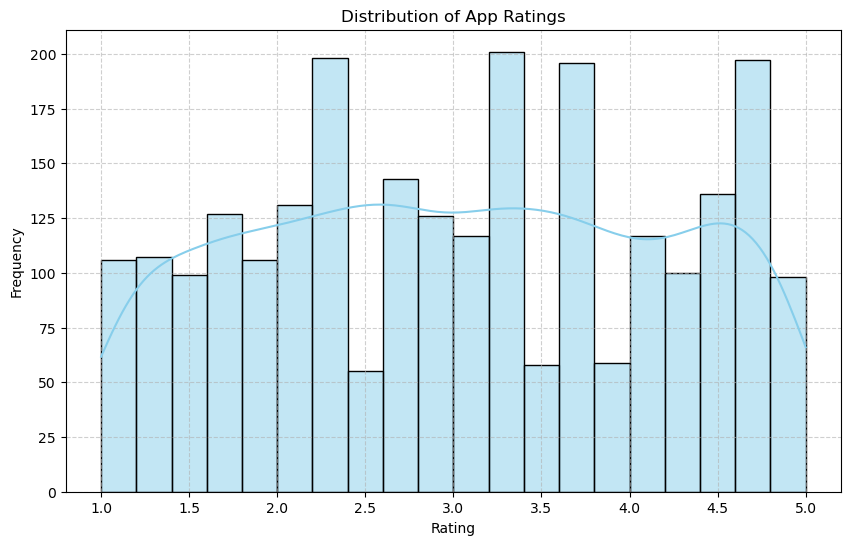

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(df['rating'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of App Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


In [13]:
# --- New Section: Time-Series Analysis with Line Plot ---
print("\n\n--- Section 2.5: Time-Series Analysis ---")

# Convert review_date to datetime objects.
df['review_date'] = pd.to_datetime(df['review_date'])
print("Converted 'review_date' to datetime format.")

# Extract year and month to group data.
df['review_month'] = df['review_date'].dt.to_period('M')

# Calculate the average rating per month.
monthly_avg_rating = df.groupby('review_month')['rating'].mean().reset_index()

# Convert the 'review_month' back to a datetime for plotting.
monthly_avg_rating['review_month'] = monthly_avg_rating['review_month'].dt.to_timestamp()




--- Section 2.5: Time-Series Analysis ---
Converted 'review_date' to datetime format.


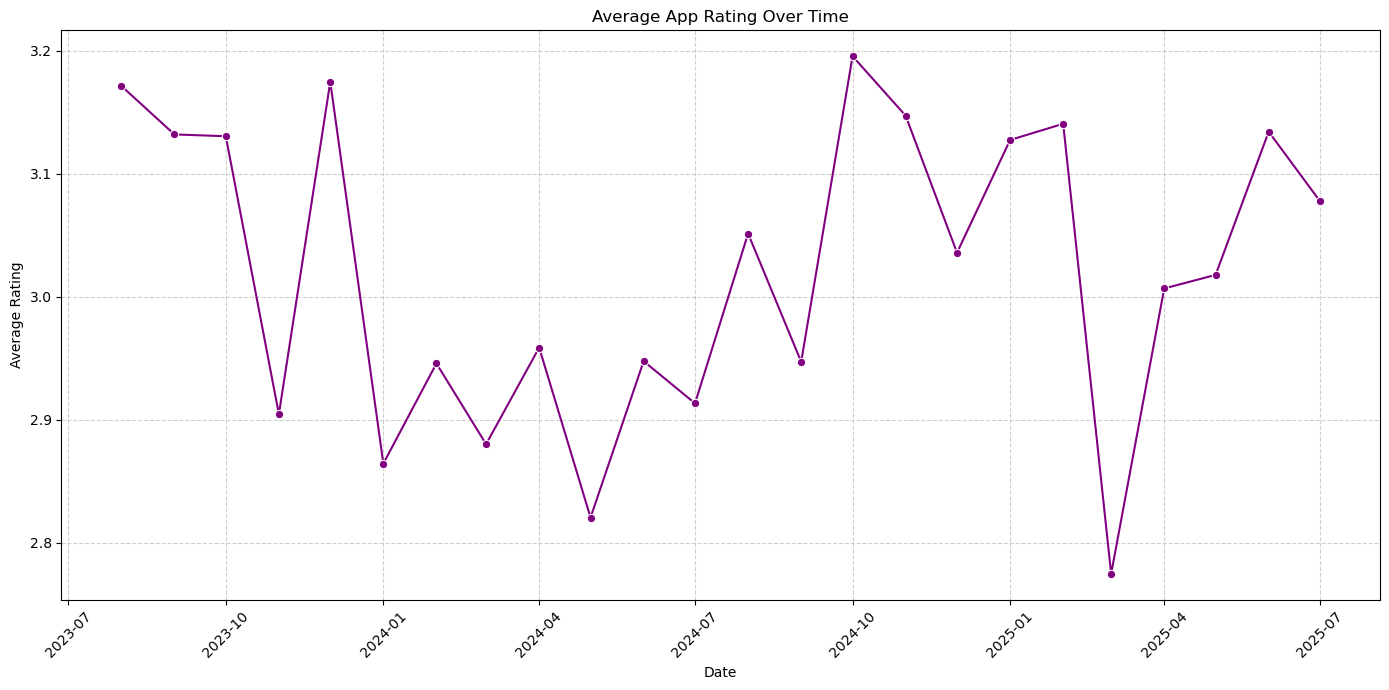

In [14]:
plt.figure(figsize=(14, 7))
sns.lineplot(x='review_month', y='rating', data=monthly_avg_rating, marker='o', color='purple')
plt.title('Average App Rating Over Time')
plt.xlabel('Date')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [15]:
# --- 3. Text Preprocessing for Machine Learning ---
print("\n\n--- Section 3: Text Preprocessing for Machine Learning ---")



--- Section 3: Text Preprocessing for Machine Learning ---



Sentiment analysis target variable created.
sentiment
negative    1287
positive    1227
Name: count, dtype: int64


C:\Users\Kerry\AppData\Local\Temp\ipykernel_1028\1807180032.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=df_clean, palette='viridis')


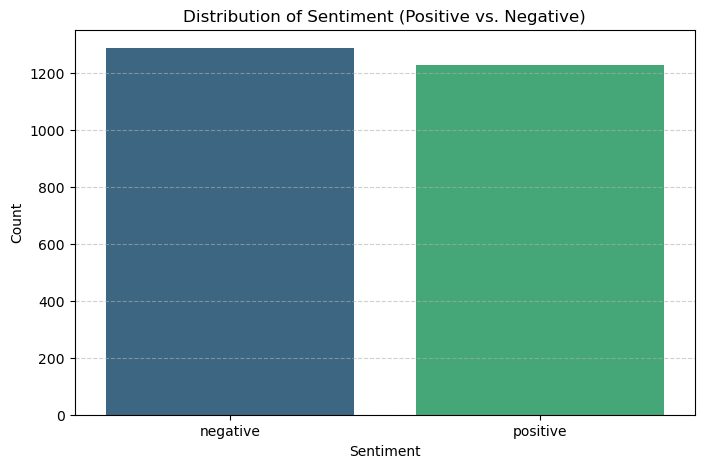

In [16]:
# Create a new target variable for sentiment classification.
# Using a simple rule: rating > 3.0 is 'positive', otherwise 'negative'.
df_clean['sentiment'] = df_clean['rating'].apply(lambda x: 'positive' if x > 3.0 else 'negative')
print("\nSentiment analysis target variable created.")
print(df_clean['sentiment'].value_counts())

# Visualize the sentiment distribution.
plt.figure(figsize=(8, 5))
sns.countplot(x='sentiment', data=df_clean, palette='viridis')
plt.title('Distribution of Sentiment (Positive vs. Negative)')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()
